In [1]:
from keras.preprocessing.image import ImageDataGenerator

# Image Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading our data and performing data augmentation

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9qAqBTyfiYJlXQHNIB9PNqROsqGFvYjrJULjGYOOiVdY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'aipowerednutritionanalyzerforfitn-donotdelete-pr-feqsxwylbgkchz'
object_key = 'Dataset.zip'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [4]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_3.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [5]:
pwd

'/home/wsuser/work'

In [6]:
import os
filenames = os.listdir('/home/wsuser/work/Dataset/TRAIN_SET')

In [7]:
#performing data augmentation to train the data
x_train=train_datagen.flow_from_directory("/home/wsuser/work/Dataset/TRAIN_SET",target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')
#performing data augmentation to test the data
x_test=test_datagen.flow_from_directory("/home/wsuser/work/Dataset/TEST_SET",target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')


Found 2626 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [8]:
print(x_train.class_indices)#checking  the no. of classes

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [9]:
from collections import Counter as c
c(x_train.labels)

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

# Model Building

In [10]:
###Importing Necessary Libraries

In [11]:
import numpy as np

In [12]:
import tensorflow


In [13]:
from tensorflow.keras.models import Sequential

In [14]:
from tensorflow.keras import layers

In [15]:
from tensorflow.keras.layers import Dense,Flatten

In [16]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
model=Sequential()

In [19]:
###Creating the model

In [20]:
classifier = Sequential()

In [21]:
classifier.add(Conv2D(32, (3, 3), input_shape=(64,64,3),activation='relu'))

In [22]:
classifier.add(MaxPooling2D(pool_size=(2,2)))


In [23]:
classifier.add(Conv2D(32, (3,3),activation='relu'))

In [24]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
classifier.add(Flatten())

# Adding Dense Layers

In [26]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5,activation='softmax'))

In [27]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [28]:
###Compiling the model

In [29]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model

In [30]:
classifier.fit_generator(generator=x_train,steps_per_epoch = len(x_train),epochs=20,validation_data=x_test,validation_steps = len(x_test))

/tmp/wsuser/ipykernel_164/2938698048.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(generator=x_train,steps_per_epoch = len(x_train),epochs=20,validation_data=x_test,validation_steps = len(x_test))


Epoch 1/20
526/526 [==============================] - 13s 25ms/step - loss: 0.1760 - accuracy: 0.9372 - val_loss: 0.0198 - val_accuracy: 0.9896
Epoch 2/20
526/526 [==============================] - 12s 23ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0334 - val_accuracy: 0.9848
Epoch 3/20
526/526 [==============================] - 12s 24ms/step - loss: 4.1784e-04 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 0.9896
Epoch 4/20
526/526 [==============================] - 13s 24ms/step - loss: 5.2463e-05 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 0.9943
Epoch 5/20
526/526 [==============================] - 12s 23ms/step - loss: 3.5900e-05 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9896
Epoch 6/20
526/526 [==============================] - 12s 23ms/step - loss: 1.1713e-05 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 0.9896
Epoch 7/20
526/526 [==============================] - 12s 23ms/step - loss: 6.0438e-06 - accuracy: 1.0000 - val_loss: 0.

In [31]:
###Saving our model

In [32]:
classifier.save('nutrition.h5')

In [33]:
!tar -zcvf nutrition-analyzer-model_new.tgz nutrition.h5

nutrition.h5


In [34]:
ls -1 

Dataset/
nutrition-analyzer-model_new.tgz
nutrition.h5


In [35]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 21.2 MB/s eta 0:00:01


In [36]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                   "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey": "XlLgmWKZbQPUF5S2WR6b3KydW4eMJN8_zmj_O2xjGjvE"
                  }
client = APIClient(wml_credentials)

In [38]:
client = APIClient(wml_credentials)

In [39]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [40]:
space_uid=guid_from_space_name(client, 'nutritionanalyzer')
print("Space UID = " + space_uid)

Space UID = 2e92ee79-8da0-4ac3-b1f1-75db352619a5


In [41]:
client.set.default_space(space_uid)

'SUCCESS'

In [42]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [43]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [44]:
model_details = client.repository.store_model(model='nutrition-analyzer-model_new.tgz',meta_props={
client.repository.ModelMetaNames.NAME:"CNN",
client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid} )
model_id = client.repository.get_model_id(model_details)

In [45]:
model_id

'de0953ea-4bdf-4f69-82c6-d17e455dda2f'

In [46]:
client.repository.download(model_id, 'nutrition_analyzer_model.h5')

Successfully saved model content to file: 'nutrition_analyzer_model.h5'


'/home/wsuser/work/nutrition_analyzer_model.h5'

In [47]:
import numpy as np
from tensorflow.keras.models  import load_model
from tensorflow.keras.preprocessing import image

In [48]:
model = load_model('nutrition.h5')

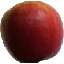

In [49]:
img = image.load_img("/home/wsuser/work/Dataset/TRAIN_SET/APPLES/5_100.jpg",grayscale=False,target_size= (64,64))
img

In [50]:
import numpy as np
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)

In [51]:
x.shape

(1, 64, 64, 3)

In [52]:
pred = np.argmax(model.predict(x),axis=1)

In [53]:
index=['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']

In [54]:
index[pred[0]]

'APPLES'